<a href="https://colab.research.google.com/github/vmalonso/Apuntes-IA/blob/main/2_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal simple (Descenso del gradiente)

<img src="https://drive.google.com/uc?id=1xv6BH4zY4sJlGSrYLplnqaAa1620Urao" alt="Drawing" width="600"/>

**En estadística, la regresión lineal es una aproximación lineal para modelar la relación entre una variable dependiente de una o más variables independientes**. Sea **x** la variable independiente e **y** la variable dependiente (calculamos *y* en función de *x*). Definimos una relación lineal entre estas dos variables de la forma siguiente:

<center><img src="https://drive.google.com/uc?id=1GS23TeM1RXBAk7Ts3sZhJPt8bcMMfxGw" alt="Drawing" width="100"/></center>

<img src="https://drive.google.com/uc?id=16xDlYMjwJbXsSyFoI-BCk2R4IVmfyUPL" alt="Drawing" width="500"/>


**m** es la pendiente de la recta. Es decir, cuánto aumenta *y* al aumentar *x*. Ejemplo: para un ángulo de la recta de 45º, al aumentar en 1 la x, la y aumenta 1. Para un ángulo de 0º, la pendiente es 0. Al aumentar x, la y no aumenta.

**b** es el punto de corte de la recta en el eje y.

Mediante este modelo, podemos predecir el valor de y para cualquier valor de x.

<center><img src="https://drive.google.com/uc?id=1GkR6sGyvQtK1C4zfHdX57Nw8HuISJHqT" alt="Drawing" width="100"/></center>


## Función de coste (Loss function)

El coste es el error que se produce para la recta creada en función de los valores **m** y **b** elegidos.

<img src="https://drive.google.com/uc?id=1gXqZQa-EVXaP_L-1nmrjKCYh_6G8R8KS" alt="Drawing" width="500"/>

Para diferenciar entre el valor real y el predicho por la recta, llamamos $y_i$ al valor real del punto $(x_i,y_i)$ e $\hat{y}_i$ al valor predicho ($\hat{y}_i=mx_i+b$)

El error producido en un punto $(x_i,y_i)$ es el valor real para ese punto menos el valor predicho por la recta de regresión: $e_i=y_i-\hat{y}_i$  o lo que es lo mismo: 

$e_i=y_i-(mx_i+b)$

Existen diversas funciones de coste. Una de ellas podría ser la media de los valores absolutos de los errores:
$E=\frac{1}{n}\sum_{i=1}^n |e_i|$

$E=\frac{1}{n}\sum_{i=1}^n |y_i-(mx_i+b)|$

Utilizamos el valor absoluto porque hay errores positivos y negativos, por lo que al sumarse se anularían.

Normalmente se utiliza como función de coste la media de los cuadrados de los errores (Mean Square Error o MSE):

$MSE=\frac{1}{n}\sum_{i=1}^n (y_i-(mx_i+b))^2$

De esa forma, al elevar al cuadrado se convierten en positivos los errores negativos.

En la práctica se usa más RSS (Residual Sum Of Squared errors) o OLS (Ordinary Least Squared errors) que elimina el $\frac{1}{n}$

$RSS=OLS=\sum_{i=1}^n (y_i-(mx_i+b))^2$

RSE (Residual Standard Error)

$RSE=\frac{1}{n-2}\sum_{i=1}^n (y_i-(mx_i+b))^2$

**A la hora de elegir una recta de regresión elegiremos unos valores de *m* y *b* que minimicen la función de coste.**

Existen métodos analíticos para calcular **m** y **b** de forma que se minimiza la función de coste, pero para ello hay que calcular la inversa de la matriz X que pude contener millones de elementos. La compejidad es esto es $O(n^3)$, por lo que resulta más rápido utilizar métodos iterativos.


## Descenso del gradiente (Gradient Descent)


Si representamos la función de coste **E** en función de la pendiente, *m*, obtendremos una curva ya que es una función cuadrática:

<img src="https://drive.google.com/uc?id=1mSuzIcADrKtKUKbyCA_Jlj9xC4eHA_2x" alt="Drawing" width="500"/>

En el descenso del gradiente tomamos un punto aleatorio de la curva y de forma iterativa vamos dando pasos que nos acerquen al mínimo de la curva.

Para distintos valores de m, la derivada es la pendiente de la curva:

<img src="https://drive.google.com/uc?id=1DejMi4KIpp0bKkB9tM5vMuuaD_AwYZ6W" alt="Drawing" width="500"/>

Cuanto mayor es la pendiente más lejos estamos de nuestro objetivo, que es el punto más bajo. Por lo tanto, podremos dar pasos más grandes. Cuando estamos cerca del objetivo daremos pasos más pequeños.

Para los distintos valores de b también nos iremos aproximando al valor mínimo:


<img src="https://drive.google.com/uc?id=1ozWKW9yB4j6zbI-Lck5VxB-LhN1YcWDl" alt="Drawing" width="500"/>

Representado en 3D:


<img src="https://drive.google.com/uc?id=1qNQiZUWCJaqYIvEtR7p8UgsjHQ-qSyfy" alt="Drawing" width="500"/>

En el descenso del gradiente, partimos de un punto arbitrario A y buscamos el mínimo B. Para calcular cómo tenemos que variar m y b para converger hace B, se calcula la derivada en función de cada una de las variables (m y b). Éstas nos darán la pendiente. Lo importante de esta pendiente es el signo, que me indicará en qué dirección hay que avanzar, incrementando o decrementando m y b. Si la pendiente es positiva, tenemos que ir en la dirección contraria, por lo que tendremos que disminuir la variable (m ó b).

El método del Descenso del Gradiente es el siguiente:




1.   Inicializamos **m** y **b** a 0, o a unos valores aleatorios.
2.   El ratio de aprendizaje (**learning rate**) indica el tamaño de los pasos que damos para acercarnos a nuestro objetivo. Este ratio, **L**, suele ser un valor muy pequeño, comprendido entre 0.1 y 0.0001. Hay que probar para ver cuál es el más apropiado para que avance deprisa pero que no se pase, porque en caso de pasarnos, el método, en lugar de converger al objetivo, éste diverge:

<img src="https://drive.google.com/uc?id=1OQ2EmytPzm8FSP5GdAYok1Yc2w6_fq3H" alt="Drawing" width="500"/>

3.    Calculamos las derivadas parciales con respecto a m de $MSE=\frac{1}{n}\sum_{i=1}^n (y_i-(mx_i+b))^2$:

> $D_m=\frac{1}{n}\sum_{i=1}^n 2(y_i-(mx_i+b))(-x_i)$

> $D_m=\frac{-2}{n}\sum_{i=1}^n x_i(y_i-\hat{y_i})$

> Y las derivadas parciales con respecto a b:

> $D_b=\frac{1}{n}\sum_{i=1}^n 2(y_i-(mx_i+b))$

> $D_b=\frac{-2}{n}\sum_{i=1}^n (y_i-\hat{y_i})$

4.    Ahora actualizamos los valores actuales de m y b de la siguiente forma:

> $m=m-L·D_m$

> $b=b-L·D_b$

5.    Repetimos el proceso desde el punto 3 hasta que la función de coste tenga un valor mínimo (0 idealmente, lo que significaría un error de 0 o 100% de precisión). Los valores de m y b en este momento serán los valores óptimos.

      Considerando la analogía con el excursionista, m puede ser considerada la posición actual, mientras que D es el equivalente a la pendiente de la cuesta, y la L la velocidad a la que se mueve. Cuando D es grande, da pasos mayores que cuando la D es pequeña. Cuando llegue al valle, nuestra función de coste será mínima.




## Coeficiente de determinación $R^2$


El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretende explicar.

$\large{R^2=\frac{\sum_{i=1}^n (\hat{y}_i-\bar{y})^2}{\sum_{i=1}^n (y_i-\bar{y})^2}}$

Donde $\bar{y}$ es la media de los valores $y_i$

El coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

*(Interesante explicación aquí: https://www.youtube.com/watch?v=2AQKmw14mHM)*



## Regresión lineal simple en Python

In [ ]:
import numpy as np
import pandas as pd

Procesamiento de los datos de entrada:

In [ ]:
# Para obtener el csv de google drive, obtener enlace y copiar el ID del fichero
# y añadir a esta URL:  https://drive.google.com/uc?export=download&id=

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1fenMPzvOrgT9qoI80tmPAtfbOZYZ3n-X', header=None)
x = df.iloc[:, 0]
y = df.iloc[:, 1]

In [ ]:
y

0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: 1, Length: 100, dtype: float64

In [ ]:
# Si queremos etiquetar las columnas (features)
df.columns = ['x', 'y']
df.head(5)

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Graficación de los datos:

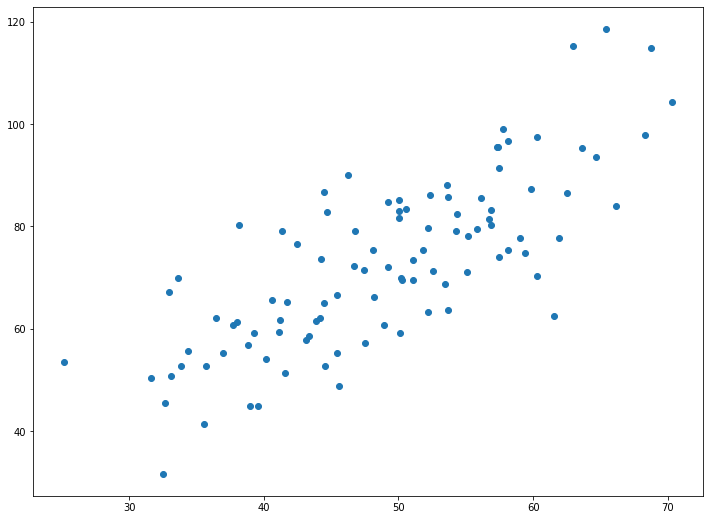

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.scatter(x, y)
plt.show()

Construcción del modelo:

In [ ]:
m = 0
b = 0
 
L = 0.00001  # El ratio de aprendizaje
epochs = 1000  # Número de iteraciones para hacer el gradient descent
 
n = float(len(x)) # Número de elementos en X
 
# Iterando para hacer el Gradient Descent
for i in range(epochs):
   y_pred = m * x + b  # El valor predicho de y actual
   D_m = (-2/n) * sum(x * (y - y_pred))  # Derivada con respeco a m
   D_b = (-2/n) * sum(y - y_pred)  # Derivada con respeco b
   m = m - L * D_m  # Actualizar m
   b = b - L * D_b  # Actualizar b
  
print (m, b)


1.4788027179317091 0.03507495019653123


Haciendo predicciones:

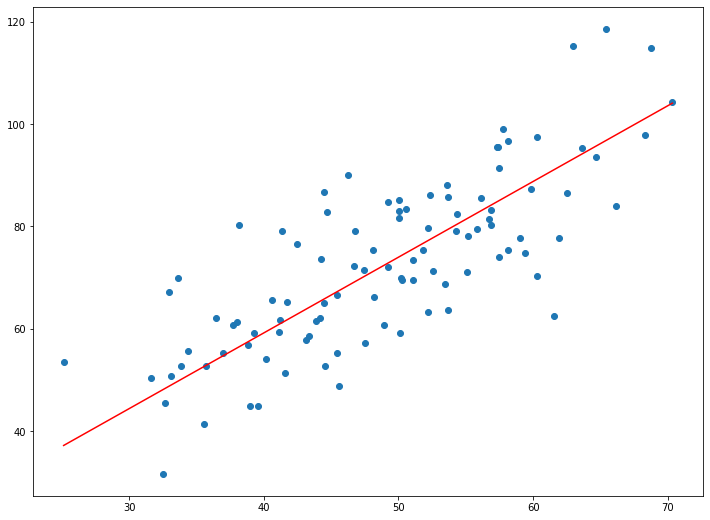

In [ ]:
y_pred = m*x + b

plt.figure(figsize=(12,9)) 
plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # Línea de regresión
plt.show()


Función de coste:

In [ ]:
# función de coste
# Mean Squared Error
MSE = np.square(y - y_pred).mean()
print("MSE =", MSE)


MSE = 112.64705665514033


In [ ]:
np.corrcoef(x, y)


array([[1.       , 0.7737285],
       [0.7737285, 1.       ]])

In [ ]:
R2 = np.corrcoef(x, y)[0, 1]**2
print("R2 =", R2)

R2 = 0.5986557915386621


## Regresión lineal simple usando Scikit-Learn

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [8]:
# Otra forma de leer el csv
data = np.genfromtxt('https://drive.google.com/uc?export=download&id=1fenMPzvOrgT9qoI80tmPAtfbOZYZ3n-X', delimiter=',')
x = data[:, 0]
y = data[:, 1]


In [ ]:
x

In [9]:
# Convertir en columna
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
x

Construimos el modelo

In [10]:
reg = LinearRegression()


... y lo entrenamos

In [11]:
reg.fit(x, y)

LinearRegression()

In [12]:
reg.coef_

array([[1.32243102]])

Los parámetros m y b son los siguientes:

In [13]:
m = reg.coef_[0][0]
print(m)
b = reg.intercept_[0]
print(b)

1.3224310227553597
7.991020982270399


Haciendo predicciones:

In [14]:
y_pred = m*x + b


In [ ]:
y_pred

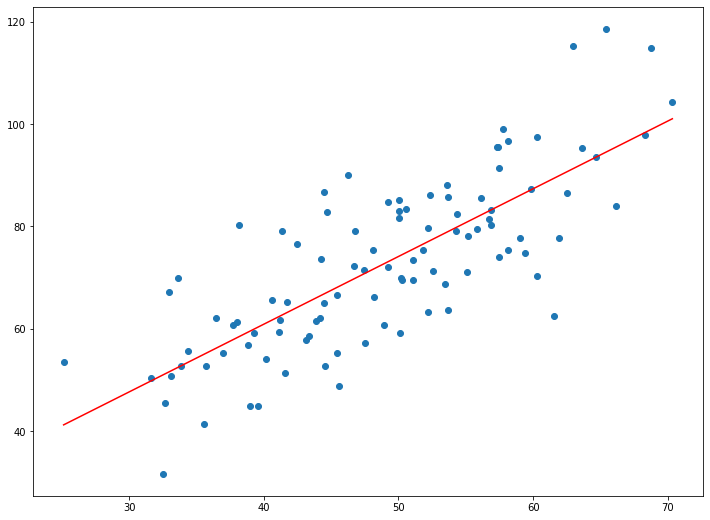

In [17]:
plt.figure(figsize=(12,9))
plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # Línea de regresión
plt.show()


In [18]:
# Otra forma, genérica en machine learning
y_pred = reg.predict(x)

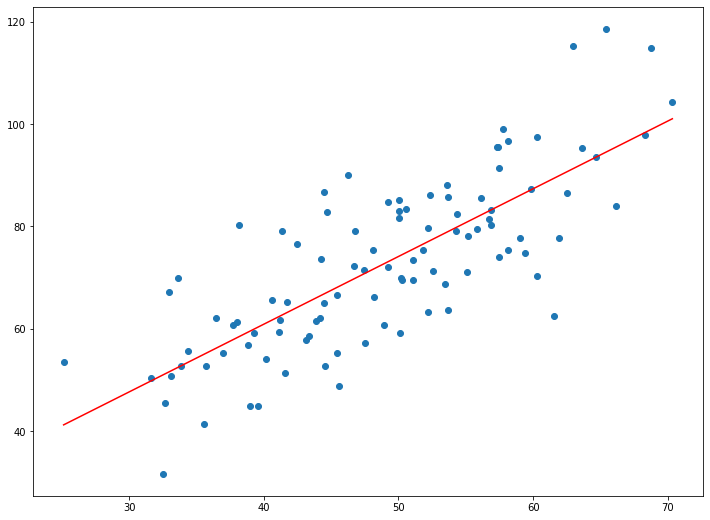

In [19]:
plt.figure(figsize=(12,9))
plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # Línea de regresión
plt.show()

In [22]:
# función de coste
# Mean Squared Error
MSE = np.square(np.subtract(y, y_pred)).mean()
print(MSE)
 
# Otra forma de calcularlo:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_pred))
 
# Otra métrica
from sklearn.metrics import r2_score
print(r2_score(y, y_pred))


110.25738346621316
110.25738346621316
0.598655791538662


In [23]:
print(reg.score(x,y)) # Otra forma. El score() es la evaluación del modelo en general.
# Para cada algoritmo el score es la métrica más utilizada para dicho modelo.

0.598655791538662


# Regresión polinómica

En ocasiones la distribución de los puntos no se ajusta a una recta sino a una curva. En estos es imposible ajustar una recta de regresión, pero basta con crear un polinomio de grado 2, 3, etc… para conseguir un mejor ajuste.

<img src="https://drive.google.com/uc?id=1hpUhVFFpHdztGc6DolzVg784P_FXQilJ" alt="Drawing" width="600"/>



$y=w_0+w_1x^2+w_2x$

Hemos cambiado la notación para que esté en mayor consonancia con la utilizada en machine learning, pero lo único que hemos añadido a la fórmula $y=mx+b$ de la regresión lineal es el término $w_1x^2$


Vamos a generar un conjunto de datos aleatorio que se ajuste a una curva:
En python: 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

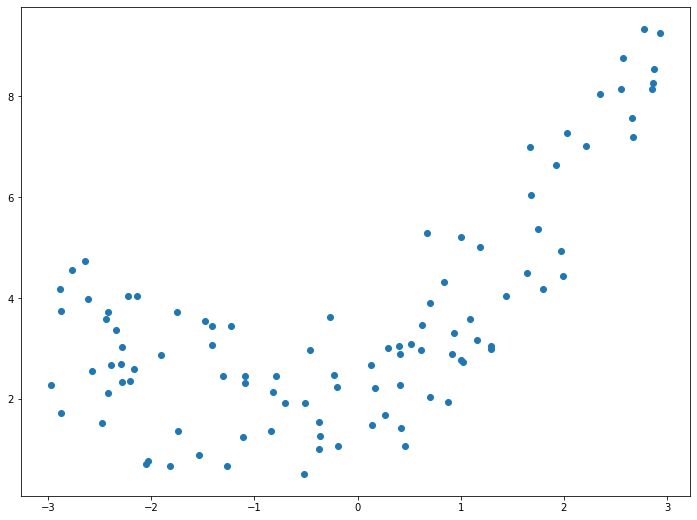

In [4]:
# generando un conjunto de datos aleatorio que se ajuste a una curva
n = 100
# np.random.rand genera un número aleatorio correspondiente a una distribuación
# normal de media =0 y desviación típica = 1
np.random.seed(0)
x = 6 * np.random.rand(n, 1) - 3
x_sorted = np.sort(x, axis=0)
y = 0.5 * x_sorted**2 + x_sorted + 2 + np.random.randn(n, 1) # randn -> normal distribution
 
plt.figure(figsize=(12,9))
plt.scatter(x_sorted, y)


Puedes dibujar la función $0.5 x^2 + x + 2$ aquí:
https://www.desmos.com/calculator


In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x_sorted) # añade x al cuadrado
print(X_poly.shape)

(100, 2)


In [ ]:
X_poly

Ahora X_poly contiene el feature x y el cuadrado de esta feature.


In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
 
lin_reg.fit(X_poly, y)
print("Coef:",lin_reg.coef_)
print("Punto de corte:", lin_reg.intercept_)


Coef: [[0.99267977 0.52387324]]
Punto de corte: [2.08727039]


Como podemos comprobar, los valores calculados de $w_0$, $w_1$ y $w_2$ son muy parecidos a los utilizados realmente para generar los valores de prueba,


In [49]:
y_pred = lin_reg.predict(X_poly)

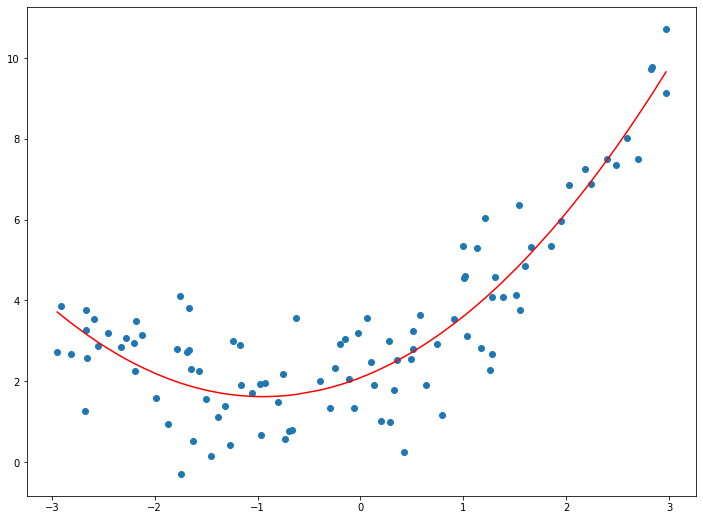

In [50]:
plt.figure(figsize=(12,9))
plt.scatter(x_sorted, y)
plt.plot(x_sorted, y_pred, c='r')

In [51]:
from sklearn import metrics
print(metrics.r2_score(y, y_pred))

0.8113531844680646


In [52]:
print(mean_squared_error(y, y_pred))

0.93425625270656


In [ ]:
# Ejercicio.
# Modifica el grado de PolynomialFeatures para ver si consigues mejor R2
''' ¿Te parece que es mejor modelo si aumentamos el grado del polinomio? ''' 

' ¿Te parece que es mejor modelo si aumentamos el grado del polinomio? '

In [ ]:
#@title -- Doble clic para ver la respuesta -- { form-width: "1%" }

# El modelo es peor porque a pesar de obtener mejor puntuación 
# la curva no se ajusta bien a la nube de puntos

# El problema que se produce aquí es el del Overfitting. 
# El modelo no generaliza bien sino que "aprende" los valores con los que es entrenado.
# Esto se corrige dividiendo el conjunto de datos en dos grupos: train y test.
# Se crea el modelo con train y se evalúa su puntuación con test
# Veremos cómo se hace esto en el tema siguiente

# Descenso del gradiente estocástico

En el descenso de gradientes, el lote es la totalidad de ejemplos que usamos para calcular el gradiente en cada iteración. Hasta ahora, hemos supuesto que el lote era el conjunto de datos completo. Al trabajar a la escala de Big Data, los conjuntos de datos suelen tener miles de millones o incluso cientos de miles de millones de ejemplos. Además, los conjuntos de datos de Big Data con frecuencia contienen inmensas cantidades de atributos. En consecuencia, un lote puede ser enorme. Un lote muy grande puede causar que incluso una sola iteración tome un **tiempo muy prolongado** para calcularse.

<img src="https://drive.google.com/uc?id=161Zja9VdwOIC44RdkSAjFFT6vDKrFY8T" alt="Drawing" width="800"/>

Es probable que un conjunto de datos grande con ejemplos muestreados al azar contenga datos redundantes. De hecho, la redundancia se vuelve más probable a medida que aumenta el tamaño del lote. Un poco de redundancia puede ser útil para atenuar las gradientes inconsistentes, pero los lotes enormes tienden a no tener un valor mucho más predictivo que los lotes grandes.

En el descenso del gradiente estocástico (SGD) tomamos **ejemplos al azar** de nuestro conjunto de datos (un tamaño del lote de 1 por iteración). De esta forma, estimamos (si bien de manera inconsistente). Cuando se dan muchas iteraciones, el SGD funciona, pero es muy inconsistente. El término "estocástico" indica que el ejemplo único que compone cada lote se elige al azar.

<img src="https://drive.google.com/uc?id=1x4dLHK8NVJc3WwYFzcus_LOWScySIxuk" alt="Drawing" width="400"/>

El comportamiento en el desenso del gradiente estocástico es un tanto errático pero mucho más rápido:

<img src="https://drive.google.com/uc?id=1654FyUdg89QlMiBPWNsm3zvVJ8sEIn70" alt="Drawing" width="800"/>



Con Gradient Descent hacíamos:

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
 
lin_reg.fit(X_poly, y)

LinearRegression()

In [54]:
y_pred = lin_reg.predict(X_poly)
print(metrics.r2_score(y, y_pred))

0.8113531844680646


Con Stochastic Gradient Descent hacemos:

In [55]:
from sklearn.linear_model import SGDRegressor
lin_reg_SGD = SGDRegressor()
 
lin_reg_SGD.fit(X_poly, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [56]:
y_pred = lin_reg_SGD.predict(X_poly)
print(metrics.r2_score(y, y_pred))

0.8101811697970178


# Descenso del gradiente estocástico en minilotes

Mini-batch Stochastic Gradient Descent

El descenso de gradiente estocástico en minilote (SGD de minilotes) es un equilibrio entre la iteración de lote completo y el SGD. Un minilote generalmente tiene entre 10 y 1,000 ejemplos, elegidos al azar. El SGD de minilote reduce la cantidad de inconsistencia del SGD, pero sigue siendo más rápido que el lote completo.

<img src="https://drive.google.com/uc?id=165HaBNjVh16KfQIHcxe6ZcUbeHX-UaAJ" alt="Drawing" width="800"/>

Definimos un método para obtener lotes aleatorios:


In [57]:
def get_batch(X, y, batch_size):
       indexes = np.random.randint(len(X), size=batch_size)
       return X[indexes,:], y[indexes,:]

Y entrenamos con Gradient descent parciales, por ejemplo, 1000 épocas:


In [58]:
from sklearn.linear_model import SGDRegressor
lin_reg_SGD = SGDRegressor()
#lin_reg = LinearRegression()
for i in range(1, 1000):
	XX, YY = get_batch(X_poly, y, batch_size = 10)
	lin_reg_SGD.partial_fit(XX, YY.ravel()) # partial_fit sólo calcula una época.
print("Coef:",lin_reg_SGD.coef_)
print("Punto de corte:", lin_reg_SGD.intercept_)


Coef: [0.99205036 0.5356587 ]
Punto de corte: [2.06179829]


In [59]:
y_pred = lin_reg_SGD.predict(X_poly)
print(metrics.r2_score(y, y_pred))

0.8111518773510358


# Regresión Lineal Múltiple

Abordaremos la regresión lineal múltiple con un ejercicio. Usaremos un dataset de distintos modelos de vehículos que incluye un atributo correspondiente a las emisiones de CO2, que trataremos como variable dependiente. Para ello, de todos los atributos nos quedaremos con el tamaño del motor, el número de cilindros y el consumo de combustible, que serán las variables independientes.

<img src="https://drive.google.com/uc?id=1CVOxgbIgNTv7weNuHHXR0waOzPzEjMRr" alt="Drawing" width="600"/>

El valor predicho $\hat{y}$ para un valor desconocido de emisiones de CO2 es descrito por la ecuación:

<center>
$\hat{y}=w_0+w_1x_1+w_2x_2+ ... +w_nx_n$
</center>

Vectorialmente:

$\begin{align}
    W = \begin{bmatrix}
           w_0 \\
           w_1 \\
           w_2 \\
           w_3 \\
           w_4 \\
           ...           
         \end{bmatrix} 
          \hspace{1cm}
          X = \begin{bmatrix}
           1 \\
           x_1 \\
           x_2 \\
           x_3 \\
           x_4 \\
           ...           
         \end{bmatrix} 
  \end{align}$

$W^T = \begin{bmatrix}
           w_0\hspace{0.2cm}\\
           w_1\hspace{0.2cm}\\
           w_2\hspace{0.2cm}\\
           w_3\hspace{0.2cm}\\
           ...           
         \end{bmatrix} $

<br>
<center>
$\hat{y}=W^TX$
</center>

Supongamos que hemos calculado el vector W.

Si tomamos la primera observación y aplicamos la fórmula, sustituyendo los valores de las variables $x_i$  tendremos el vector X = [ 1, 2.0, 4, 8.5 ]. Pongamos, por ejemplo, que obtenemos un valor de 140. Si observamos el valor real de $y_i$ vemos que es 196. Luego se ha producido un error de 56.
<center>
$e_i=y_i-\hat{y}_i$
</Center>

$e_0=y_0-\hat{y}_0=196-140=56$

$MSE=\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$

Utilizaremos el descenso del gradiente para obtener los parámetros W. Supongamos que obtenemos el siguiente $W^T=[125, 6.2, 14, … ]$

<center>
$\hat{y}=125+6.2x_1+14x_2+ ...$
</center>

Para nuestro caso en el que no conocemos las emisiones de $CO_2$, :

<img src="https://drive.google.com/uc?id=1DZok0gA8CqfGeGUJmd9wT3ewHPnpMoca" alt="Drawing" width="600"/>

Con esta fórmula podemos predecir las emisiones de nuestro caso hipotético.

<center>
$\hat{y}=125+6.2·2.4+14·4 + ...$
</center>


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# Para descargar los datos, utilizaremos !wget para descargarlos desde IBM Object Storage.
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-10-13 16:22:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2021-10-13 16:22:17 (2.21 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Tracemos los valores de las emisiones con respecto al tamaño del motor:

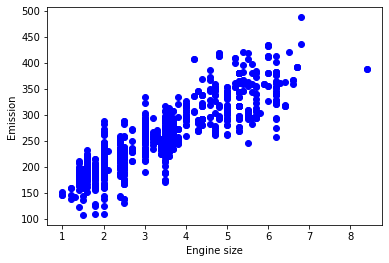

In [ ]:
plt.scatter(cdf['ENGINESIZE'], cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creando los datasets de entrenamiento y test
La división entrenamiento/test implica dividir el conjunto de datos en conjuntos que son mutuamente excluyentes. Después de lo cual, se entrena con el conjunto de entrenamiento y se valida con el conjunto de test. 
Esto proporcionará una evaluación más exacta de la precisión fuera de la muestra, ya que el conjunto de datos de la prueba no forma parte del conjunto de datos que se ha utilizado para entrenar el modelo. Es más realista para los problemas del mundo real.

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
msk = np.random.rand(len(df))

Entrenamiento:

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_train = train[['CO2EMISSIONS']]
regr.fit(X_train, y_train)
# Los coeficientes
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
y_pred_train = regr.predict(X_train)
metrics.r2_score(y_train, y_pred_train)

Coefficients:  [[10.66054809  7.92961692  9.62633001]]
Intercept:  [63.09477335]


0.8651326142329048

In [ ]:
from sklearn import metrics
X_test = test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_test = test[['CO2EMISSIONS']]
y_pred = regr.predict(X_test)
metrics.r2_score(y_test, y_pred)

0.8586490582549573

In [ ]:
p = [[2.0, 4, 8.5]]
p_pred = regr.predict(p)


In [ ]:
p_pred

array([[197.95814231]])

In [ ]:
# Comprube cuál sería el R2 si usáramos el dataset train en lugar del test
# ¿Era de esperar?

In [ ]:
y_pred

# Regresión logística

<img src="https://drive.google.com/uc?id=1aBpr3wGlqXQisDIQ87T980sGyvFkzgoo" alt="Drawing" width="600"/>

La regresión lineal vista anteriormente se utiliza para determinar el valor de una variable dependiente continua. En cambio, la regresión logística se utiliza generalmente para fines de **clasificación**. A diferencia de la regresión lineal, la variable dependiente sólo puede tomar un número limitado de valores, es decir, **la variable dependiente es categórica**. Cuando el número de resultados posibles es de solo dos, se denomina Regresión logística binaria.

En Regresión lineal, la salida es la suma ponderada de las entradas. En la regresión logística no generamos la suma ponderada de las entradas directamente, sino que la pasamos a través de una función (llamada **función de activación**) que le asigna un valor real entre 0 y 1.

<img src="https://drive.google.com/uc?id=13U8Xy1z_WuNEX26i-F8gWeHGHSPV28g5" alt="Drawing" width="400"/>

La **función de activación** que se utiliza se conoce como función **sigmoide** y tiene la siguiente forma:

$F(x)=\large{\frac{1}{1+e^{-x}}}$

Plot aquí: https://www.desmos.com/calculator/dxoubwyp5h

Podemos usar 0.5 como el umbral de probabilidad para determinar las clases. Si la probabilidad es mayor que 0.5, la clasificamos como Clase 1 (Y = 1) en caso contrario como Clase 0 (Y = 0)



Veamos las suposiciones hechas por Regresión logística:

 

*   La variable dependiente debe ser categórica
*   Las variables independientes (características) deben ser independientes (para evitar la multicolinealidad).


Ejemplo:

<img src="https://drive.google.com/uc?id=1LAF1L5994ywLjkdTAlfxw1XbhjBzOkR8" alt="Drawing" width="500"/>


In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load data
# data = np.loadtxt('./heights_weights.csv', delimiter=',', skiprows=1)

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1ypiN0Kalkwsu6ygDomGRNVi5x2Fj-8TO')
print("Data shape: ",df.shape)
print(df.head(10))

Data shape:  (10000, 3)
   Gender     Height      Weight
0       1  73.847017  241.893563
1       1  68.781904  162.310473
2       1  74.110105  212.740856
3       1  71.730978  220.042470
4       1  69.881796  206.349801
5       1  67.253016  152.212156
6       1  68.785081  183.927889
7       1  68.348516  167.971110
8       1  67.018950  175.929440
9       1  63.456494  156.399676


In [ ]:
categories = np.array(['Female', 'Male'])

X = df.values[:,1:3]
y = df.values[:,0]

print("X shape:", X.shape)


X shape: (10000, 2)


In [ ]:
# Fit (train) the Logistic Regression classifier
clf = linear_model.LogisticRegression()
#clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
clf.fit(X, y)

# Predict
prediction_result = clf.predict([[70,180]])
print("Predicción para height: 70, weight: 180:", categories[int(prediction_result)])

Predicción para height: 70, weight: 180: Male


In [ ]:
prediction_result

array([1.])

In [ ]:
print("Coefs:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefs: [[-0.47828673  0.19680042]]
Intercept: [-0.0100464]


No handles with labels found to put in legend.


   Gender     Height      Weight
0       1  73.847017  241.893563
1       1  68.781904  162.310473
2       1  74.110105  212.740856
3       1  71.730978  220.042470
4       1  69.881796  206.349801
      Gender     Height      Weight
5000       0  58.910732  102.088326
5001       0  65.230013  141.305823
5002       0  63.369004  131.041403
5003       0  64.479997  128.171511
5004       0  61.793096  129.781407


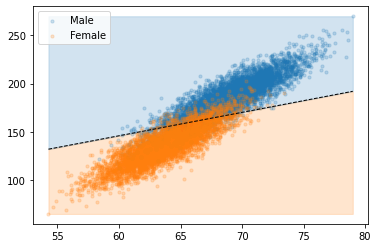

In [ ]:


#--------------
# To plot the decision boundary
parameters = clf.coef_
x_values = [np.min(X[:, 0]), np.max(X[:, 0])]
y_values = - (parameters[0] + np.dot(X[1], x_values)) / parameters[0]

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = min(X[:,0]), max(X[:,0])
ymin, ymax = min(X[:,1]), max(X[:,1])
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)
plt.legend()

#--------------

# plots
X_male = df.loc[df['Gender'] == 1.0]
X_female = df.loc[df['Gender'] == 0.0]
print(X_male.head(5))
print(X_female.head(5))
plt.scatter(X_male.iloc[:, 1], X_male.iloc[:, 2], s=10, label='Male', alpha=0.2)
plt.scatter(X_female.iloc[:, 1], X_female.iloc[:, 2], s=10, label='Female', alpha=0.2)
# plt.xlabel = "Peso"
# plt.ylabel = "Altura"

plt.legend()
plt.show()


In [ ]:
# Coeficiente de determinación R2

from sklearn import metrics
y_pred = clf.predict(X)
print(metrics.r2_score(y, y_pred))

0.6779999999999999


In [ ]:
# En la Regresión Logística es mejor utilizar como métrica la exactitud (Porcentaje de aciertos):

print(metrics.accuracy_score(y, y_pred))


0.9195


In [ ]:
# Predecimos un ejemplo:
height = 68
weight = 172

y_pred_1 = clf.predict([[height, weight]])
print(y_pred_1)

[1.]


In [ ]:
import math
y_pred_calc = height*clf.coef_[0][0] + weight*clf.coef_[0][1] + clf.intercept_
y_pred_calc_sigm = 1 / (1 + math.exp(-y_pred_calc))

In [ ]:
print(y_pred_calc_sigm)


0.7885368928698269


Veremos Regresión Logística Multiclase en el tema 4